# Stroke Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder

In [40]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [41]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [42]:

print( '-'*30)

------------------------------


In [43]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


* id : identifiant unique.  
* gender : genre du patient.  
* age : âge du patient.  
* hypertension : 0 si le patient n'a pas d'hypertension, 1 si le patient a de
l'hypertension.
* heart_disease : 0 si le patient n'a pas de maladie cardiaque, 1 si le
patient a une maladie cardiaque.
* ever_married : si le patient a déjà été marié ou pas.
* work_type : type de travail du patient.
* Residence_type : type de résidence du patient "Rural" ou "Urbain" (=1).
* avg_glucose_level : taux moyen de glucose dans le sang.
* bmi : indice de masse corporelle.
* smoking_status : "a déjà fumé", "n'a jamais fumé", "fumé" ou "Inconnu ".
* stroke : 1 si le patient a eu un accident vasculaire cérébral ou 0 s'il n'en
a pas eu.

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [45]:
df.duplicated().sum()

0

In [46]:
for col in df.select_dtypes('number'):
    print("_____",col) 
    print("nbr_nan:",df[col].isna().sum())
    print("valeurs uniques :",df[col].nunique())
    print(df[col].unique()[:5])
    print(df[col].value_counts())
    print("_ _ _ _ _ _ _ _ _ _") 
    print("_ _ _ _ _ _ _ _ _ _") 

_____ id
nbr_nan: 0
valeurs uniques : 5110
[ 9046 51676 31112 60182  1665]
id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ age
nbr_nan: 0
valeurs uniques : 104
[67. 61. 80. 49. 79.]
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ hypertension
nbr_nan: 0
valeurs uniques : 2
[0 1]
hypertension
0    4612
1     498
Name: count, dtype: int64
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ heart_disease
nbr_nan: 0
valeurs uniques : 2
[1 0]
heart_disease
0    4834
1     276
Name: count, dtype: int64
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ avg_glucose_level
nbr_nan: 0
valeurs uniques : 3979
[228.69 202.21 105.92 171.23 174.12]
avg_glucose_level
93.88

In [47]:
for col in df.select_dtypes('object'):
    print("_____",col) 
    print("nbr_nan:",df[col].isna().sum())
    print("valeurs uniques :",df[col].nunique())
    print(df[col].unique()[:5])
    print(df[col].value_counts())
    print("_ _ _ _ _ _ _ _ _ _") 
    print("_ _ _ _ _ _ _ _ _ _") 

_____ gender
nbr_nan: 0
valeurs uniques : 3
['Male' 'Female' 'Other']
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ ever_married
nbr_nan: 0
valeurs uniques : 2
['Yes' 'No']
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ work_type
nbr_nan: 0
valeurs uniques : 5
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ Residence_type
nbr_nan: 0
valeurs uniques : 2
['Urban' 'Rural']
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
_ _ _ _ _ _ _ _ _ _
_ _ _ _ _ _ _ _ _ _
_____ smoking_status
nbr_nan: 0
valeurs uniques : 4
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
smoking_status
never smoked       1892
Unknown            1544


<Axes: >

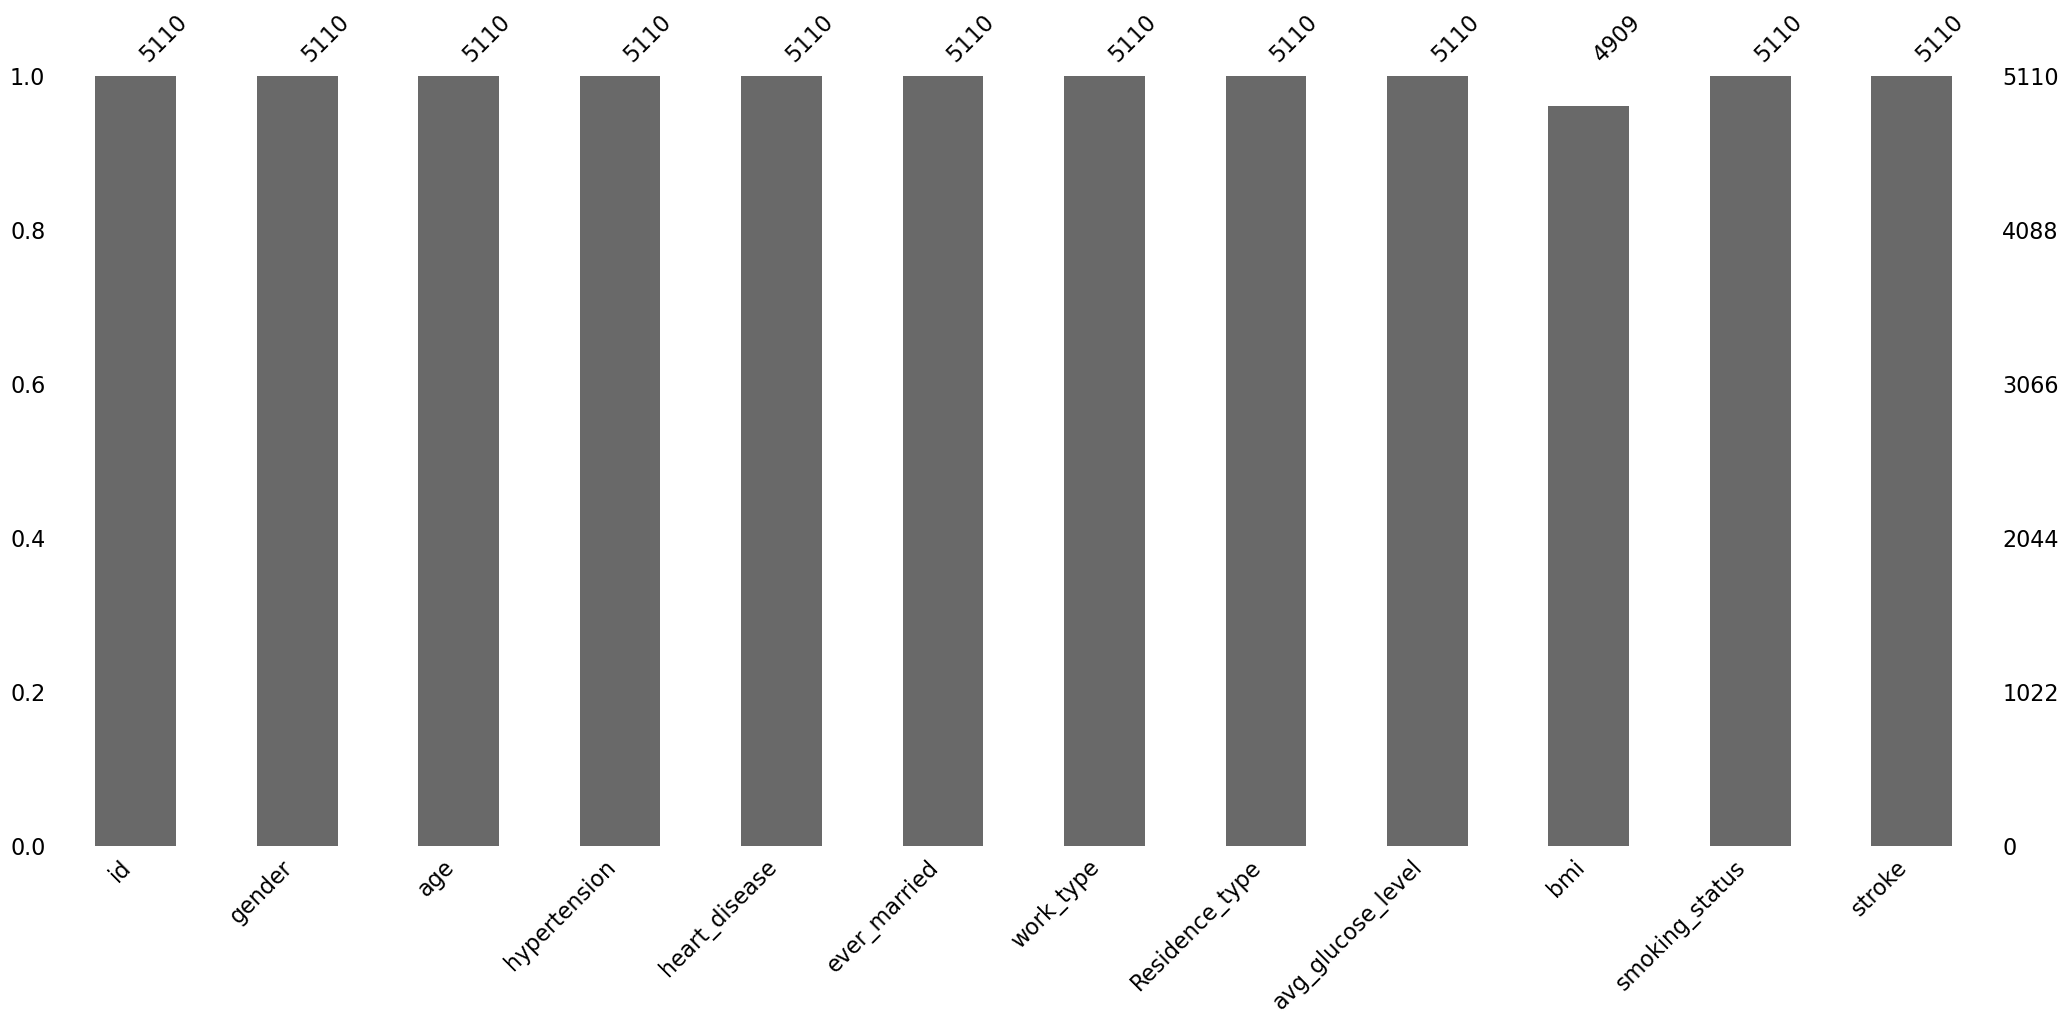

In [48]:
msno.bar(df)

In [49]:
df.loc[df['bmi'].isna(),:].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,201.000000,0.0,201.000000
mean,23171.109453,52.049154,0.233831,0.164179,126.724627,NaN,0.199005
std,20882.483120,22.276181,0.424323,0.371363,59.240322,NaN,0.400249
min,67.000000,0.480000,0.000000,0.000000,57.520000,NaN,0.000000
25%,4062.000000,37.000000,0.000000,0.000000,81.430000,NaN,0.000000
50%,18234.000000,58.000000,0.000000,0.000000,99.870000,NaN,0.000000
75%,37937.000000,71.000000,0.000000,0.000000,191.790000,NaN,0.000000
max,72231.000000,82.000000,1.000000,1.000000,260.850000,NaN,1.000000


La colonne **bmi** contient 201 valeurs manquantes.  
Avant de choisir une méthode d'imputation, je décide d'observer l'ensemble de mes variables. Cela me permettra de déterminer la méthode optimale d'imputation.

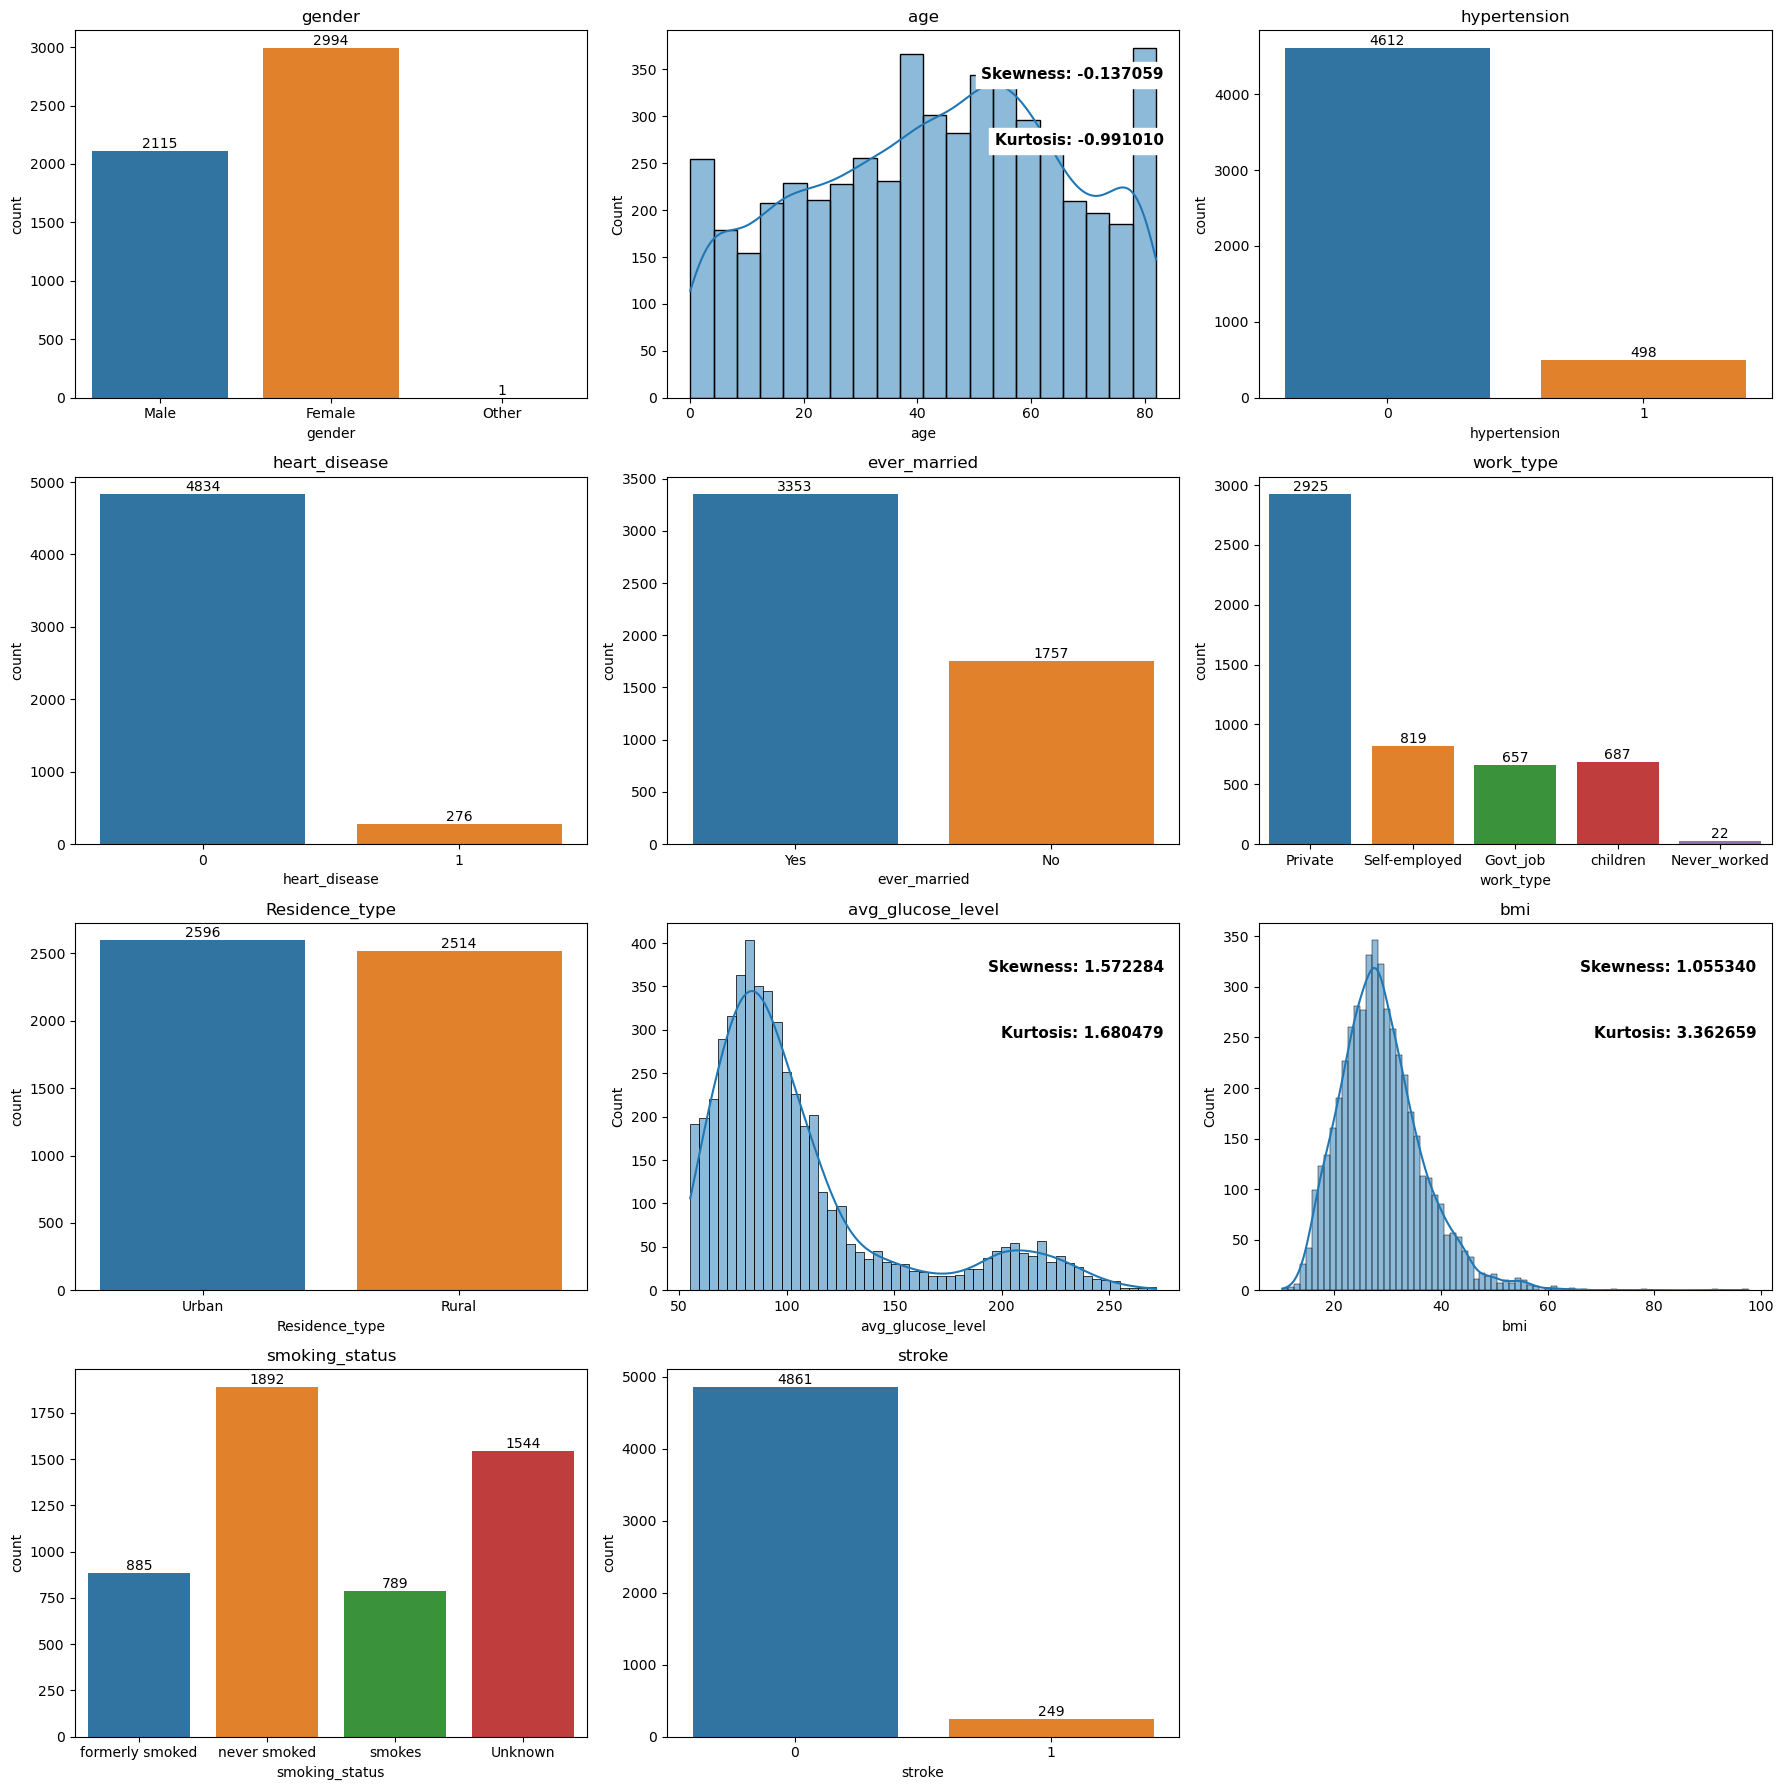

In [50]:
# Sélection des colonnes à visualiser
columns = df.columns[1:]

# Création de sous-plots avec 3 lignes et 3 colonnes
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

# Boucle pour créer des graphiques
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3

    if df[column].dtype == 'object' or df[column].dtype=='int64':
        # Pour les variables catégorielles 
        sns.countplot(x=column, data=df, ax=axes[row, col])
        axes[row, col].bar_label(axes[row, col].containers[0])
        axes[row, col].set_title(f'{column}')
    else:
        # Pour les variables continues
        sns.histplot(x=column, data=df, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{column}')
        # Ajout des informations de skewness et kurtosis
        skewness = df[column].skew()
        kurt = df[column].kurt()
        if not pd.isnull(skewness) and not pd.isnull(kurt):
            axes[row, col].text(x=0.97, y=0.90, transform=axes[row, col].transAxes,
                                s="Skewness: %f" % skewness,
                                fontweight='demibold', fontsize=11, verticalalignment='top',
                                horizontalalignment='right', backgroundcolor='white')
            axes[row, col].text(x=0.97, y=0.70, transform=axes[row, col].transAxes,
                                s="Kurtosis: %f" % kurt,
                                fontweight='demibold', fontsize=11, verticalalignment='center',
                                horizontalalignment='right', backgroundcolor='white')

# Ajustement de l'espacement entre les sous-plots
fig.delaxes(axes[3,2])
plt.tight_layout()
plt.show()


Avant de commencer l'analyse des différentes variables, on remarque que la colonne stroke (dite target) est désiquilibrée. Je vais diviser mon dataframe en deux afin d'isoler mes deux groupes stroke (0/1) et relancer mes graphiques.

In [53]:
#Je retire d'abord la ligne dont le genre est 'other' car une valeur ne peut pas représenter une classe.
df= df.loc[df['gender']!='Other',:]

In [54]:
df_0= df.loc[df['stroke']==0,:];
df_1= df.loc[df['stroke']==1,:]

In [61]:
df_0['gender'].value_counts(normalize=True)

gender
Female    0.587037
Male      0.412963
Name: proportion, dtype: float64

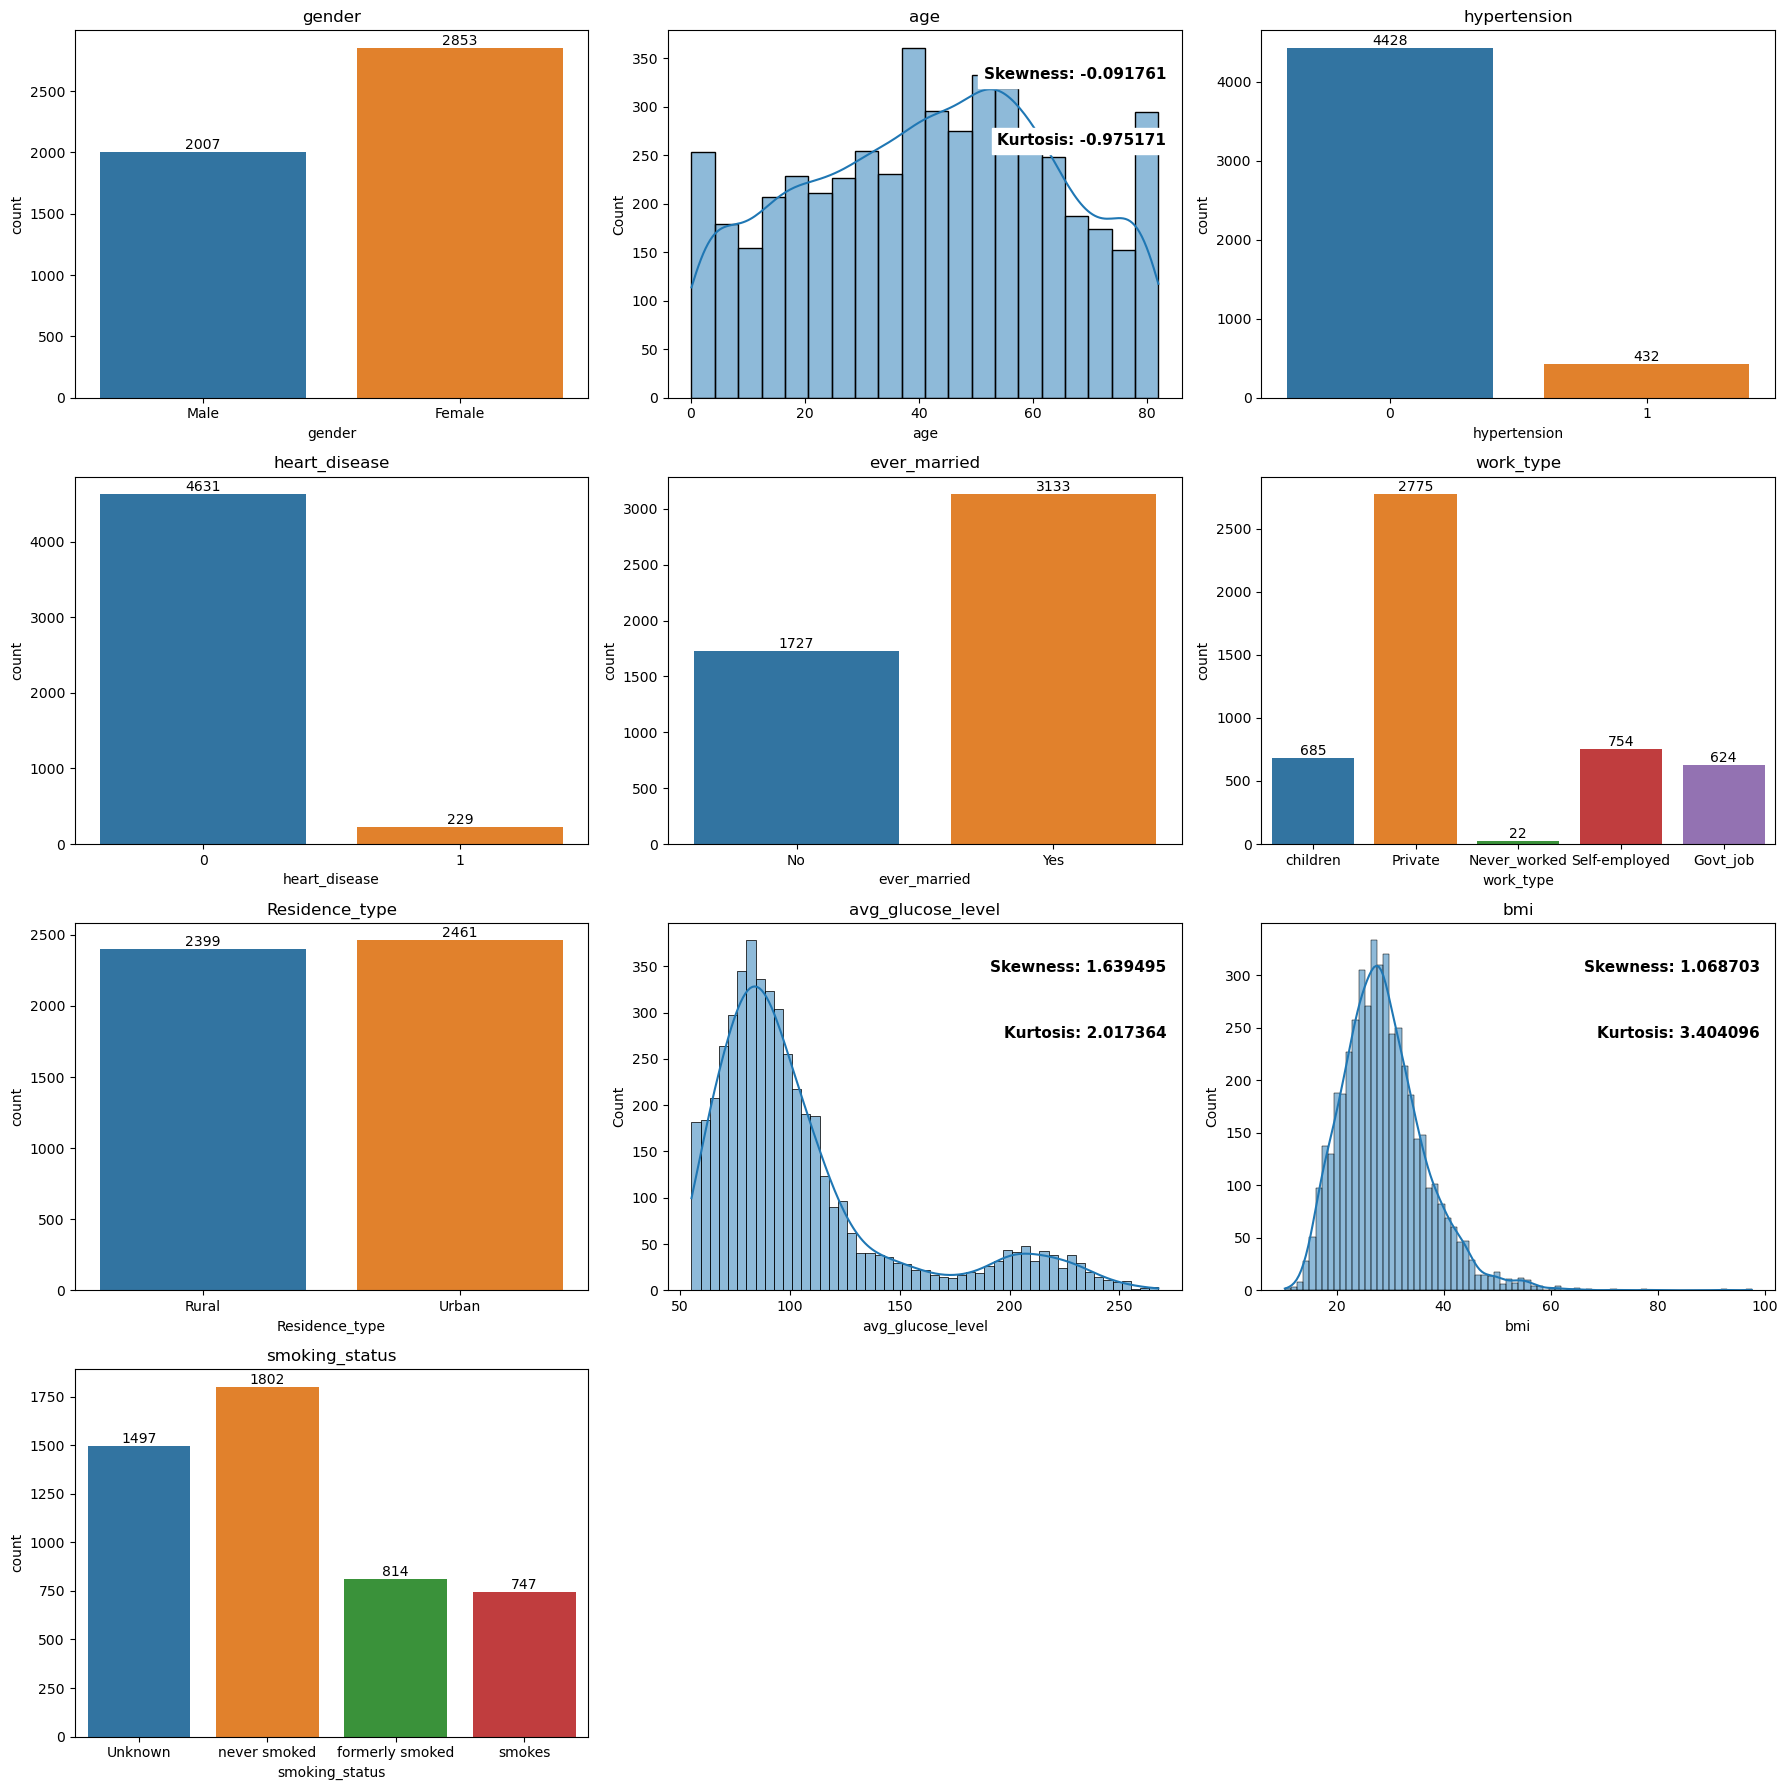

In [63]:
# Sélection des colonnes à visualiser
columns = df_0.columns[1:]

# Création de sous-plots avec 3 lignes et 3 colonnes
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

# Boucle pour créer des graphiques
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3

    if df_0[column].dtype == 'object' or df_0[column].dtype=='int64':
        # Pour les variables catégorielles 
        sns.countplot(x=column, data=df_0, ax=axes[row, col])
        axes[row, col].bar_label(axes[row, col].containers[0])
        proportion = df_0[column].value_counts(normalize=True)
        axes[row, col].set_title(f'{column}')
    else:
        # Pour les variables continues
        sns.histplot(x=column, data=df_0, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{column}')
        # Ajout des informations de skewness et kurtosis
        skewness = df_0[column].skew()
        kurt = df_0[column].kurt()
        if not pd.isnull(skewness) and not pd.isnull(kurt):
            axes[row, col].text(x=0.97, y=0.90, transform=axes[row, col].transAxes,
                                s="Skewness: %f" % skewness,
                                fontweight='demibold', fontsize=11, verticalalignment='top',
                                horizontalalignment='right', backgroundcolor='white')
            axes[row, col].text(x=0.97, y=0.70, transform=axes[row, col].transAxes,
                                s="Kurtosis: %f" % kurt,
                                fontweight='demibold', fontsize=11, verticalalignment='center',
                                horizontalalignment='right', backgroundcolor='white')

# Ajustement de l'espacement entre les sous-plots
fig.delaxes(axes[3,2])
fig.delaxes(axes[3,1])
plt.tight_layout()
plt.show()


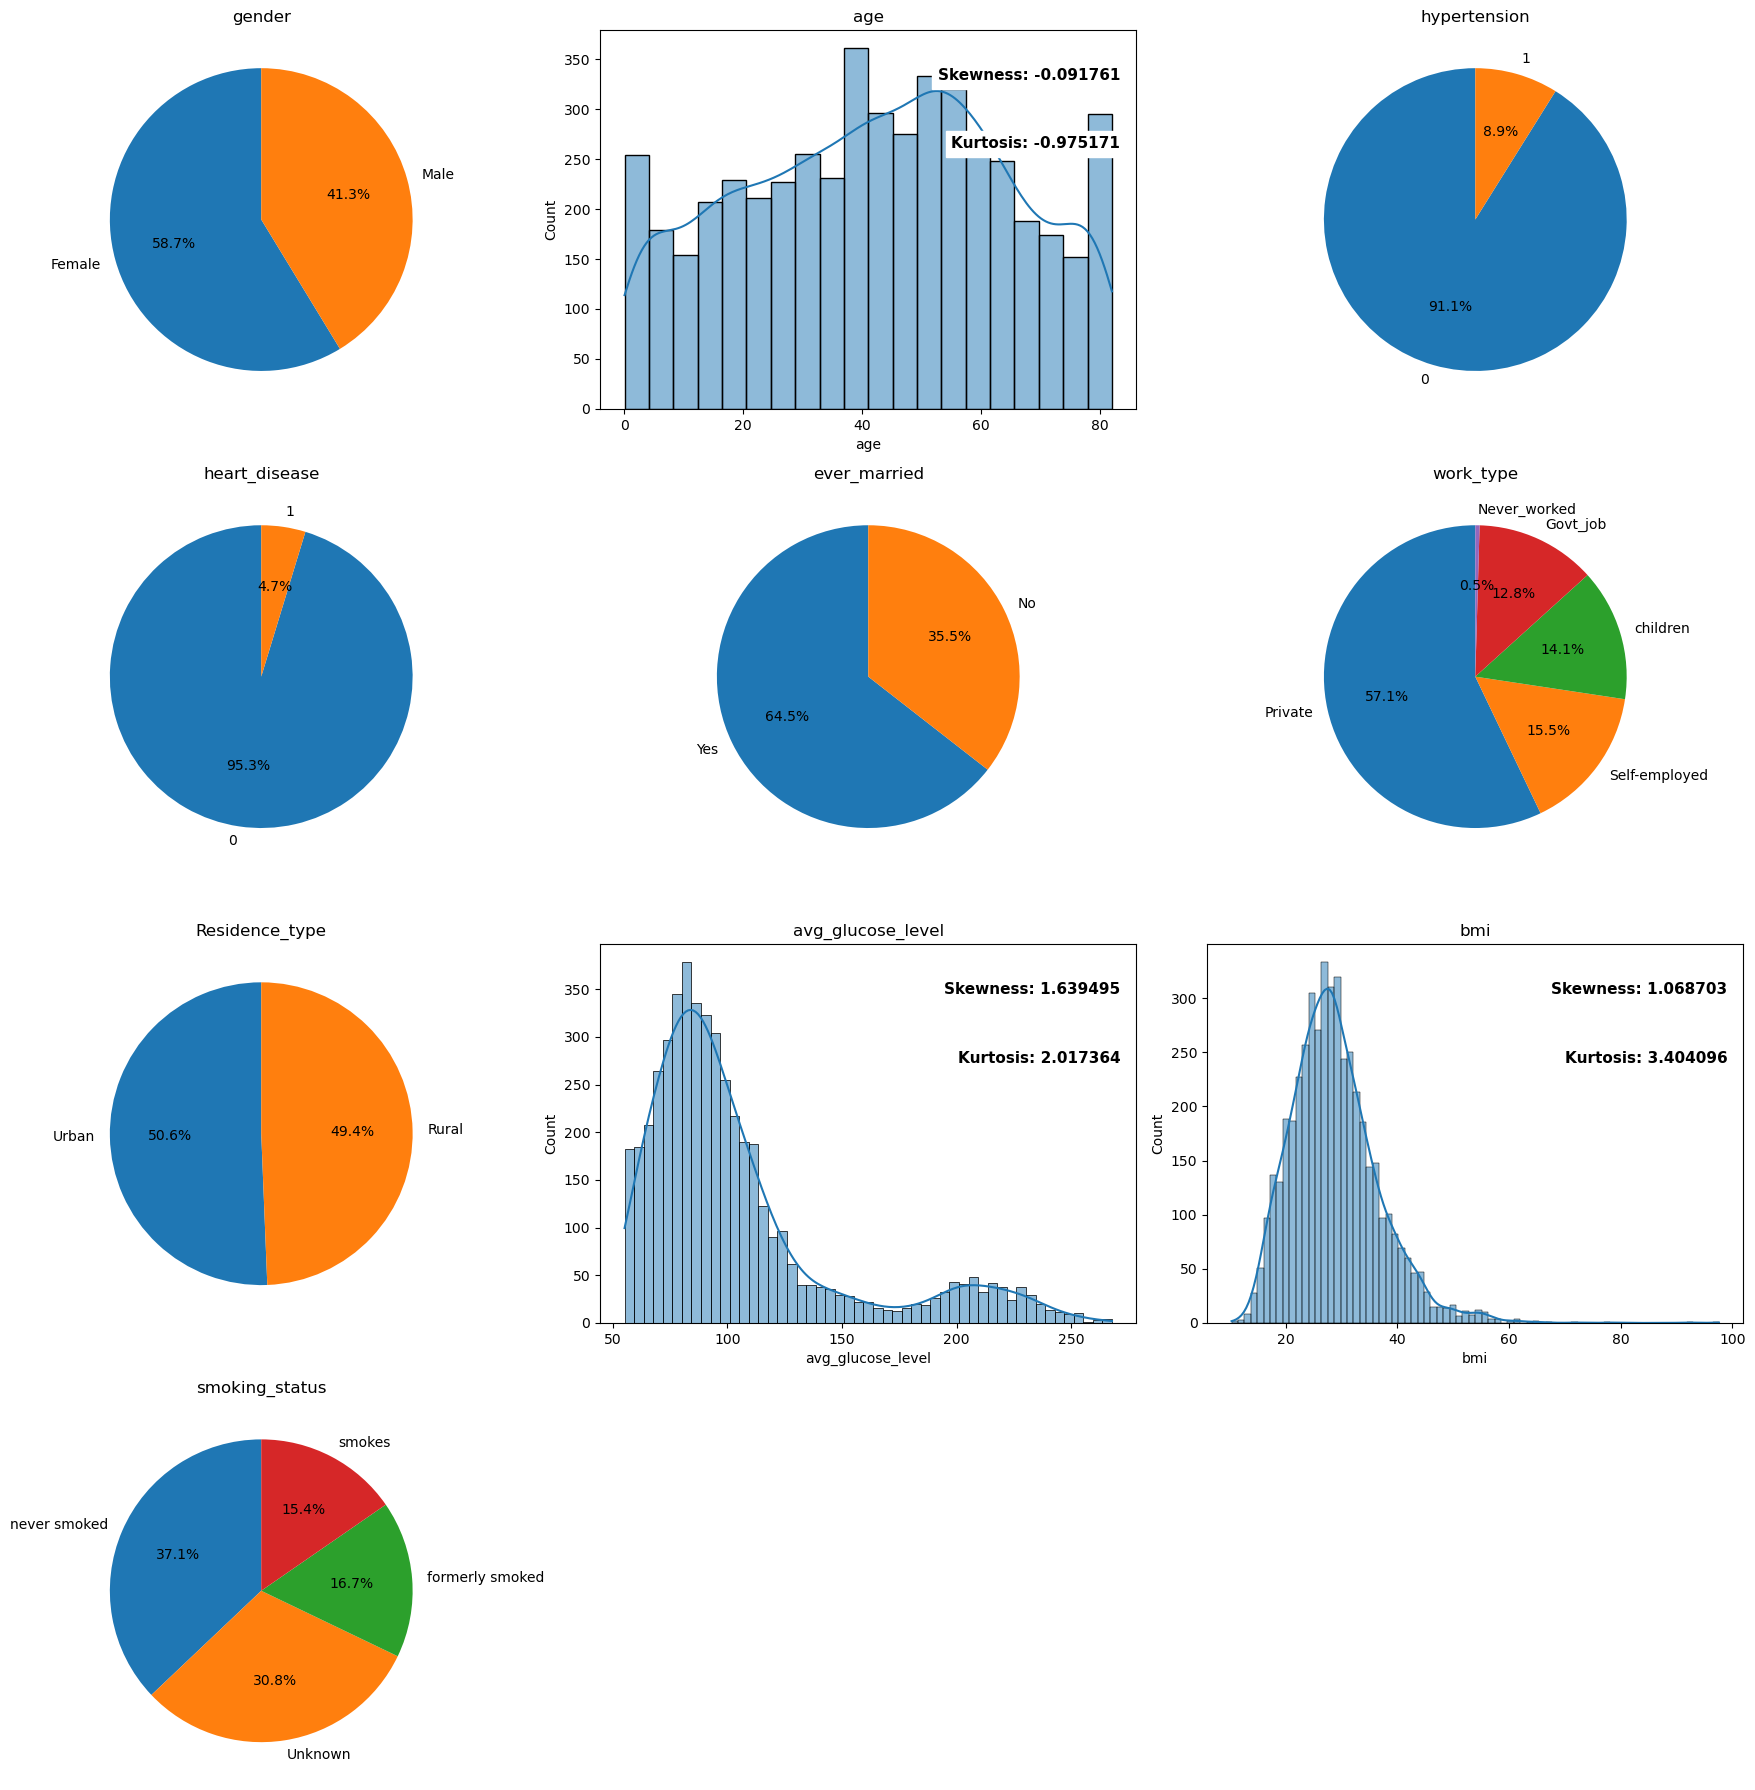

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sélection des colonnes à visualiser
columns = df_0.columns[1:]

# Création de sous-plots avec 4 lignes et 3 colonnes pour accommoder les pie charts
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

# Boucle pour créer des graphiques
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3

    if df_0[column].dtype == 'object' or df_0[column].dtype == 'int64':
        # Pour les variables catégorielles
        proportions = df_0[column].value_counts(normalize=True)
        axes[row, col].pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
        axes[row, col].set_title(f'{column}')
    else:
        # Pour les variables continues
        sns.histplot(x=column, data=df_0, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{column}')
        # Ajout des informations de skewness et kurtosis
        skewness = df_0[column].skew()
        kurt = df_0[column].kurt()
        if not pd.isnull(skewness) and not pd.isnull(kurt):
            axes[row, col].text(x=0.97, y=0.90, transform=axes[row, col].transAxes,
                                s="Skewness: %f" % skewness,
                                fontweight='demibold', fontsize=11, verticalalignment='top',
                                horizontalalignment='right', backgroundcolor='white')
            axes[row, col].text(x=0.97, y=0.70, transform=axes[row, col].transAxes,
                                s="Kurtosis: %f" % kurt,
                                fontweight='demibold', fontsize=11, verticalalignment='center',
                                horizontalalignment='right', backgroundcolor='white')

# Ajustement de l'espacement entre les sous-plots
fig.delaxes(axes[3, 2])
fig.delaxes(axes[3, 1])
plt.tight_layout()
plt.show()


**Observations des données des personnes classés 0 (pas d'avc):**  
* On compte 60% de femmes pour 40% d'hommes
* La colonne âge indique un score skewness de -0.09 et un score Kurtosis de -0.97, ce qui nous permet de supposer que malgré une légère asymétrie à gauche et un léger aplatissement par rapport à une distribution normale, cette distribution est relativement proche de la normale.
* 92% des personnes de ce groupe ne souffrent pas d'hypertension
* 95% des personnes de ce groupe n'ont pas de maladies cardiaques.
* 64% des personnes ont déjà été marié.  
* 57% des personnes travaillent dans le secteur privé
* Il n'y a pas de classe majoritaire dans la colonne residence type
* Pour la colonne avg glucose level, les valeurs indiquent une distribution qui est à la fois asymétrique vers la droite (skewness positif) et a des pics plus élevés par rapport à une distribution normale (kurtosis positif). 
* La colonne bmi indique une asymétrie à droite (présence d'outliers) et une distribution plus élevée que la normale.

Le coefficient d'asymétrie (Sk, skewness en anglais) évalue le défaut de symétrie d'une distribution:
* Il est **nul pour une distribution symétrique**. 
* Il est **positif pour une distribution étalée à droite**.
* Il est **négatif pour une distribution étalée à gauche.**  

Le coefficient d'aplatissement (K, kurtosis en anglais) évalue la dispersion des valeurs "extrêmes" par référence à la loi normale. 
* Il est **nul pour une distribution normale**
* Il est **négatif pour une distribution moins "aplatie" qu'une distribution normale** 
* Il est **positif sur une distribution plus aplatie qu'une distribution normale.**

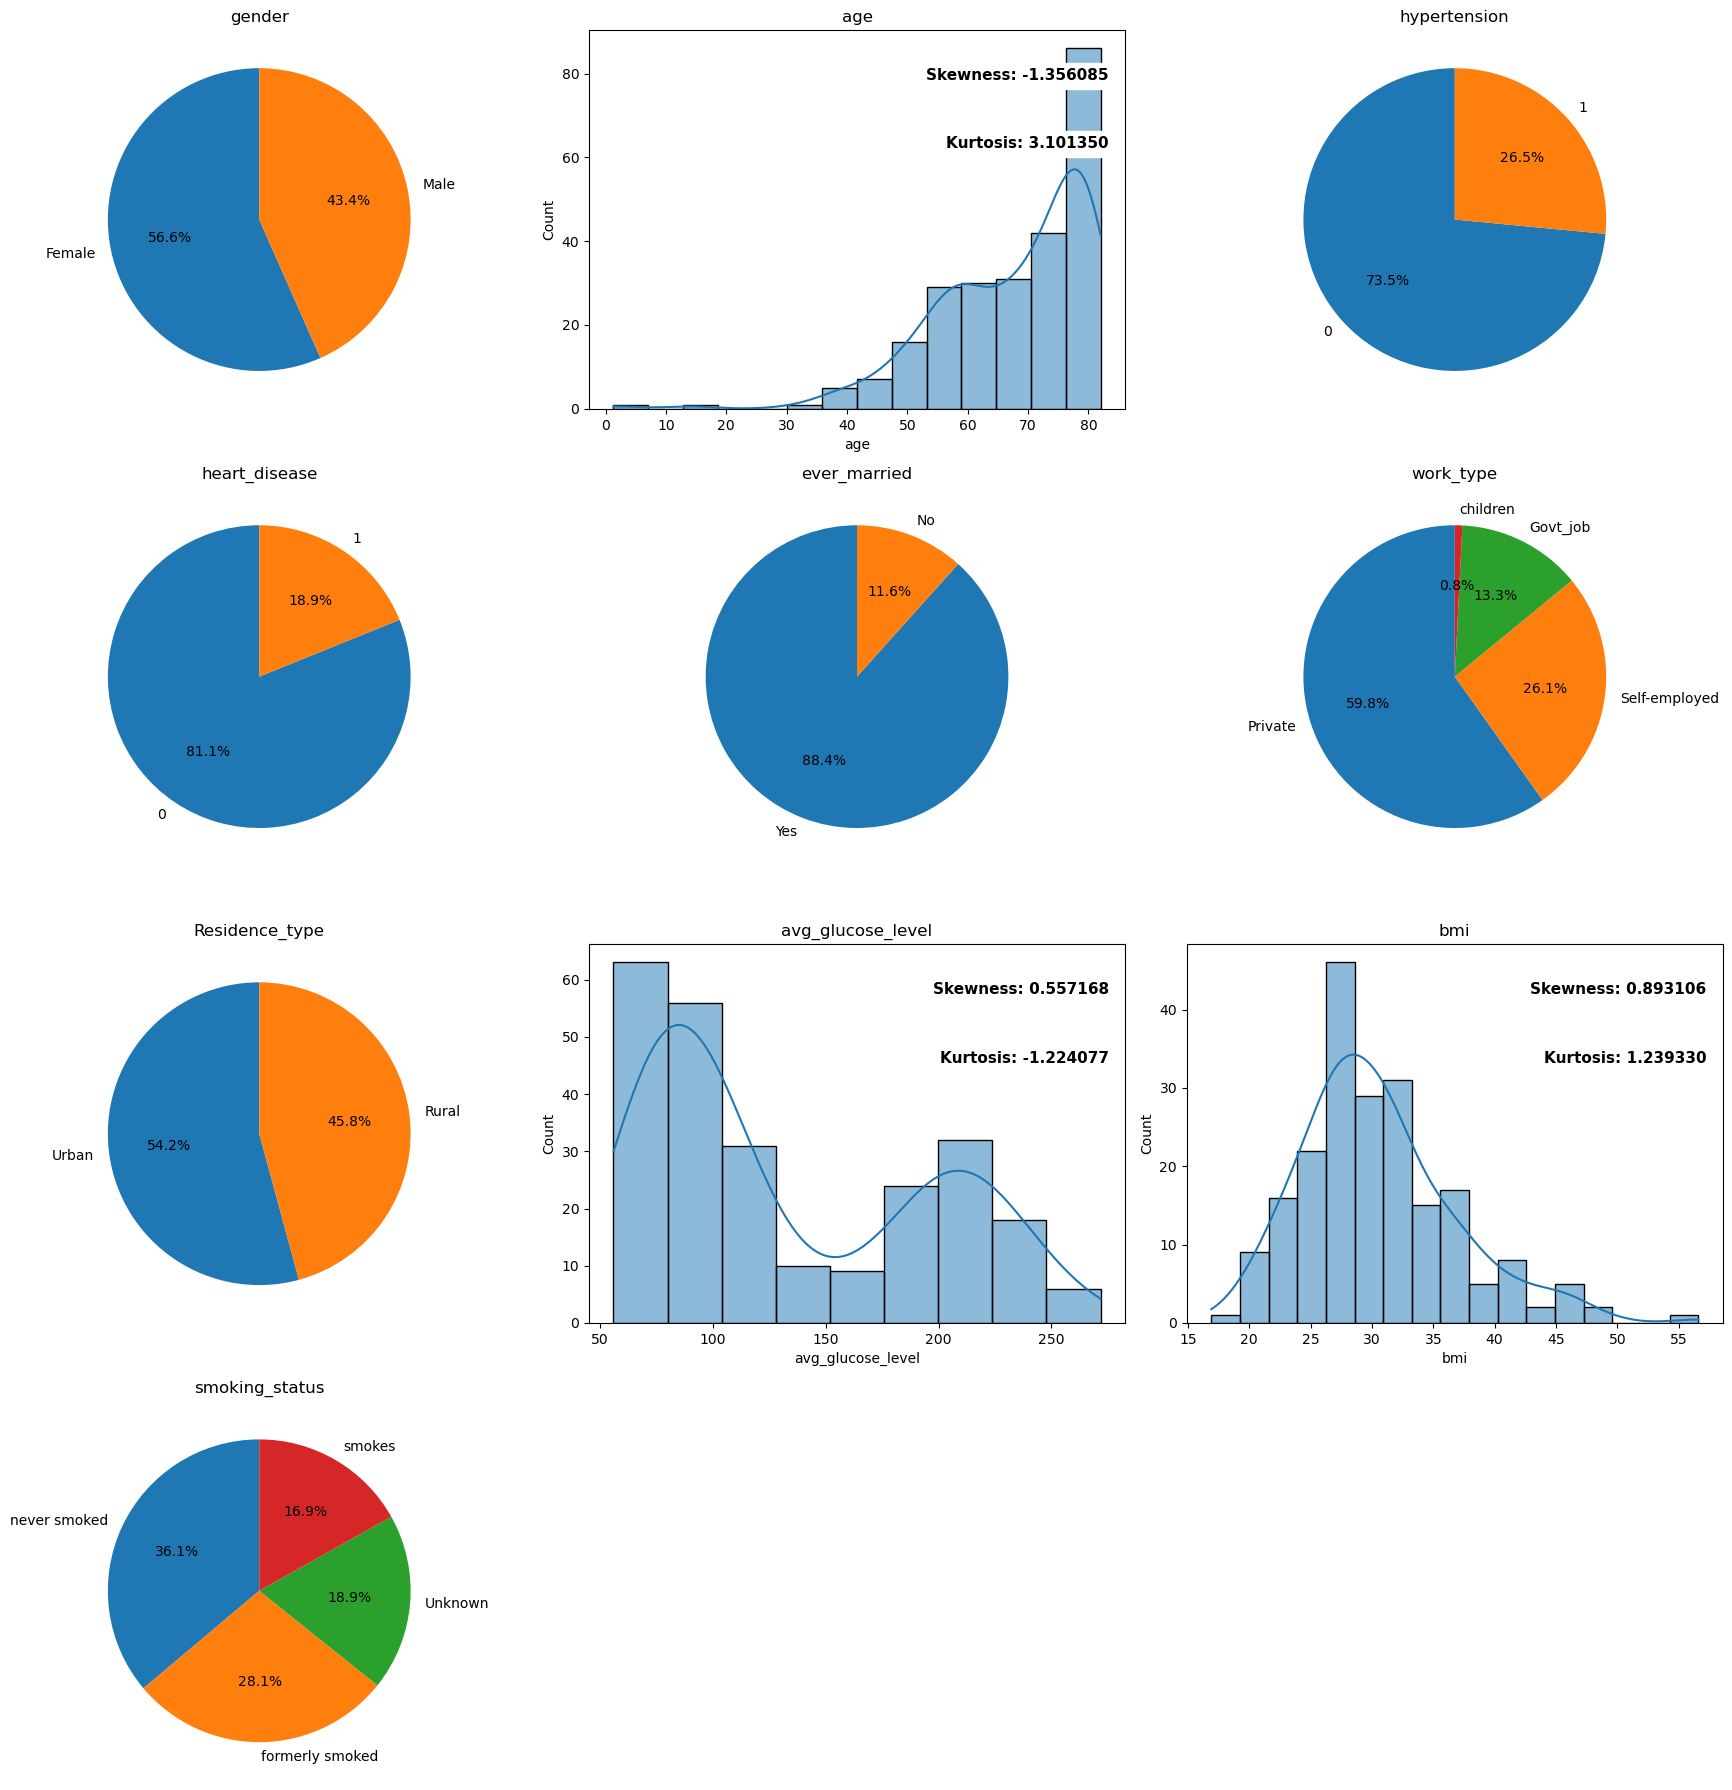

In [67]:
# Sélection des colonnes à visualiser
columns = df_1.columns[1:]

# Création de sous-plots avec 4 lignes et 3 colonnes pour accommoder les pie charts
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

# Boucle pour créer des graphiques
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3

    if df_1[column].dtype == 'object' or df_1[column].dtype == 'int64':
        # Pour les variables catégorielles
        proportions = df_1[column].value_counts(normalize=True)
        axes[row, col].pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
        axes[row, col].set_title(f'{column}')
    else:
        # Pour les variables continues
        sns.histplot(x=column, data=df_1, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{column}')
        # Ajout des informations de skewness et kurtosis
        skewness = df_1[column].skew()
        kurt = df_1[column].kurt()
        if not pd.isnull(skewness) and not pd.isnull(kurt):
            axes[row, col].text(x=0.97, y=0.90, transform=axes[row, col].transAxes,
                                s="Skewness: %f" % skewness,
                                fontweight='demibold', fontsize=11, verticalalignment='top',
                                horizontalalignment='right', backgroundcolor='white')
            axes[row, col].text(x=0.97, y=0.70, transform=axes[row, col].transAxes,
                                s="Kurtosis: %f" % kurt,
                                fontweight='demibold', fontsize=11, verticalalignment='center',
                                horizontalalignment='right', backgroundcolor='white')

# Ajustement de l'espacement entre les sous-plots
fig.delaxes(axes[3, 2])
fig.delaxes(axes[3, 1])
plt.tight_layout()
plt.show()


**Observartions :**
* La colonne 'gender' comprend 56% de femmes.
* La colonne âge indique une asymétrie à droite avec un skewness à -1.35 et un applatissement plus haut que pour une distribution normale. 
* 73% des personnes de ce groupe n'ont pas d'hypertension
* 81% des personnes de ce groupe n'ont pas de maladies cardiaques
* 88% des personnes ont déjà été mariés
* 59% des personnes travaillent dans le secteur privé
* 55% des personnes vivent en région urbaine
* La colonne avg_glucose est de type bimodale ce qui sous entend qu'il y a 2 sous ensembles au sein de cette catégorie (une concentration entre 50 et 150 et une autre entre 150 et 250)
* Pour la colonne bmi, les valeurs suggèrent une distribution légèrement asymétrique vers la droite, avec une concentration de valeurs plus importante autour de la moyenne et des extrémités plus épaisses que dans une distribution normale. Le score du kurtosis relativement faible indique que la distribution a des pics qui ne sont pas très élevés par rapport à une distribution normale.
* 36% des personnes de ce groupe n'ont jamais fumé et 28% sont des anciens fumeurs.

Nos deux groupes présentent des caractéristiques différentes. C'est pour cette raison que j'ai choisi d'utiliser la méthode d'imputation KNN Imputer.

In [68]:
df_nan = df.loc[df['bmi'].isna(),:]

In [69]:
df_nan

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


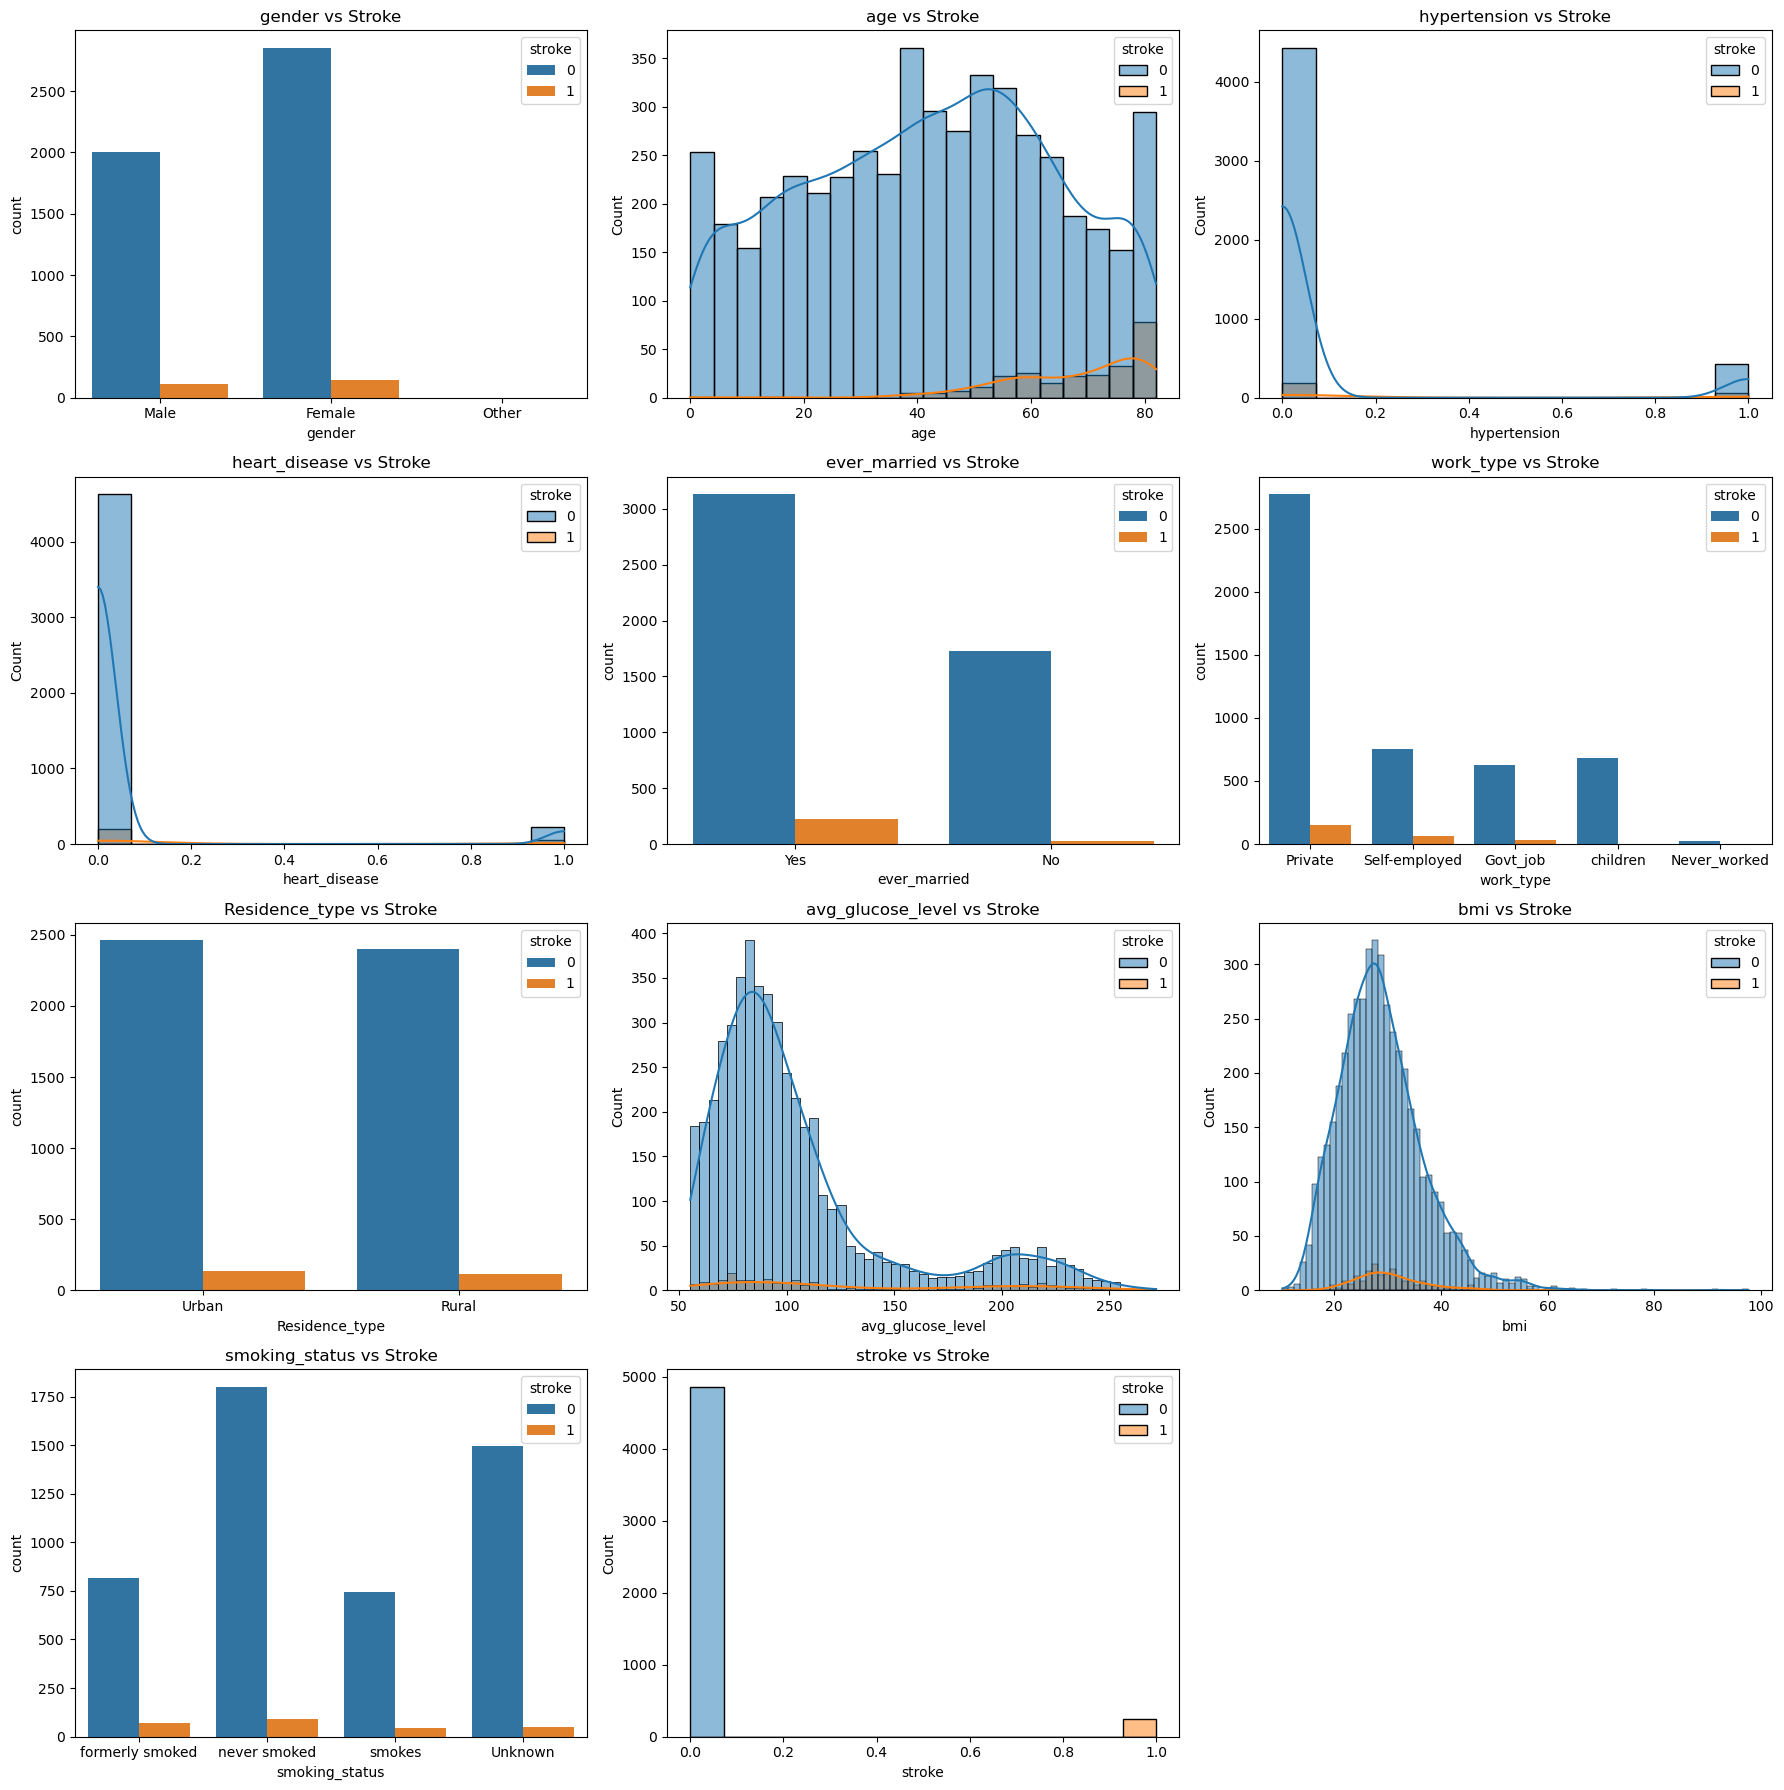

In [20]:
df_nan.iloc[:,1:-1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes


In [21]:
df_nan.iloc[:,1:-1].describe(include='all')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
count,201,201.000000,201.000000,201.000000,201,201,201,201.000000,0.0,201
unique,2,NaN,NaN,NaN,2,4,2,NaN,NaN,4
top,Male,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,Unknown
freq,104,NaN,NaN,NaN,149,114,106,NaN,NaN,61
mean,NaN,52.049154,0.233831,0.164179,NaN,NaN,NaN,126.724627,NaN,NaN
std,NaN,22.276181,0.424323,0.371363,NaN,NaN,NaN,59.240322,NaN,NaN
min,NaN,0.480000,0.000000,0.000000,NaN,NaN,NaN,57.520000,NaN,NaN
25%,NaN,37.000000,0.000000,0.000000,NaN,NaN,NaN,81.430000,NaN,NaN
50%,NaN,58.000000,0.000000,0.000000,NaN,NaN,NaN,99.870000,NaN,NaN
75%,NaN,71.000000,0.000000,0.000000,NaN,NaN,NaN,191.790000,NaN,NaN


Pour imputer les valeurs manquantes, je décide de commencer par encoder mes variables catégorielles et de standardiser mes valeurs afin d'appliquer un KNNImputer.

## Encodage

**Définition: un encodeur est utilisé pour convertir des variables catégorielles en une variable numérique afin de pouvoir les utiliser sur des modèles de machine learning, qui travaillent généralement avec des données numériques.**. 

Il existe différents type d'encodeurs:  

**LabelEncoder:**  

Il convertit chaque classe unique d'une variable catégorielle en un nombre entier. Utile lorsque l'ordre des catégories n'a pas d'importance.  

**OneHotEncoder:** 

Il crée une colonne binaire distincte pour chaque catégorie unique. Utile lorsque l'ordre des catégories n'a pas d'importance.  

**OrdinalEncoder:**

Il ressemble au LabelEncoder, mais avec la possibilité de spécifier un ordre explicite des catégories.

Pour mon jeu de données, je décide d'utiliser le One Hot Encodeur.

In [70]:
df_encode = df.copy()

In [71]:
object_cols = df_encode.select_dtypes(include=['object']).columns

# Initialiser l'encodeur One-Hot
encoder = OneHotEncoder()

# Boucle pour encoder chaque colonne 'object'
for col in object_cols:
    # Effectuer l'encodage
    encoded_cols = encoder.fit_transform(df_encode[[col]]).toarray()

    # Créer de nouvelles colonnes avec des noms uniques pour chaque catégorie
    new_cols = [f"{col}_{category}" for category in encoder.get_feature_names_out([col])]

    # Ajouter les nouvelles colonnes au DataFrame
    df_encode[new_cols] = pd.DataFrame(encoded_cols, index=df_encode.index)

    # Supprimer la colonne originale
    df_encode.drop(col, axis=1, inplace=True)

# Afficher le DataFrame après l'encodage
print(df_encode.head())

      id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1             228.69  36.6       1   
1  51676  61.0             0              0             202.21   NaN       1   
2  31112  80.0             0              1             105.92  32.5       1   
3  60182  49.0             0              0             171.23  34.4       1   
4   1665  79.0             1              0             174.12  24.0       1   

   gender_gender_Female  gender_gender_Male  ever_married_ever_married_No  \
0                   0.0                 1.0                           0.0   
1                   1.0                 0.0                           0.0   
2                   0.0                 1.0                           0.0   
3                   1.0                 0.0                           0.0   
4                   1.0                 0.0                           0.0   

   ...  work_type_work_type_Never_worked  work_type_work

In [72]:
df_encode

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_gender_Female,gender_gender_Male,ever_married_ever_married_No,...,work_type_work_type_Never_worked,work_type_work_type_Private,work_type_work_type_Self-employed,work_type_work_type_children,Residence_type_Residence_type_Rural,Residence_type_Residence_type_Urban,smoking_status_smoking_status_Unknown,smoking_status_smoking_status_formerly smoked,smoking_status_smoking_status_never smoked,smoking_status_smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,51676,61.0,0,0,202.21,NaN,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60182,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1665,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,44873,81.0,0,0,125.20,40.0,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,19723,35.0,0,0,82.99,30.6,0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,37544,51.0,0,0,166.29,25.6,0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Standardisation (normalisation)

Pour pouvoir utiliser le KNN Imputer, je dois aussi mettre à l'échelle mes données.  
Sklearn propose 3 types de standardiseurs :  
* **Standard Scaler** : Il standardise les données en les centrant autour de zéro (moyenne = 0) et en les mettant à l'échelle en fonction de l'écart type.   
* **Min Max Scaler** : Il met à l'échelle les données dans une plage spécifique, généralement entre 0 et 1. Il est utile lorsque les données ont une distribution non normale ou avec des algorithmes sensibles à l'échelle.  
* **Robust Scaler** : Il utilise des statistiques robustes en éliminant les médianes et en échelonnant les données en fonction des quantiles. Cela le rend robuste aux valeurs aberrantes.

In [99]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

column_ibm = df_encode[['bmi']]
other_columns = df_encode.drop(columns=['bmi'])

# Utiliser le KNNImputer pour remplacer les valeurs manquantes dans la colonne "ibm"
knn_imputer = KNNImputer(n_neighbors=2)
column_ibm_imputed = knn_imputer.fit_transform(column_ibm)

# Remplacer la colonne "ibm" dans le DataFrame original
df['bmi'] = column_ibm_imputed

# Appliquer le RobustScaler aux données
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df_encode)
# Recréer un DataFrame avec les données mises à l'échelle
df_scaled = pd.DataFrame(df_scaled, columns=df_encode.columns)

# Afficher le DataFrame mis à l'échelle
print(df_scaled)

            id       age  hypertension  heart_disease  avg_glucose_level  \
0    -0.755386  0.611111           0.0            1.0           3.712619   
1     0.399805  0.444444           0.0            0.0           2.994030   
2    -0.157440  0.972222           0.0            1.0           0.381004   
3     0.630301  0.111111           0.0            0.0           2.153324   
4    -0.955397  0.944444           1.0            0.0           2.231750   
...        ...       ...           ...            ...                ...   
5104 -0.506409  0.972222           1.0            0.0          -0.220624   
5105  0.215457  1.000000           0.0            0.0           0.904206   
5106 -0.466060 -0.277778           0.0            0.0          -0.241248   
5107  0.016855  0.166667           0.0            0.0           2.019267   
5108  0.210200 -0.027778           0.0            0.0          -0.179104   

           bmi  stroke  gender_gender_Female  gender_gender_Male  \
0     0.911111     

/var/folders/rq/wk_7ljvj3tx158ytgkmpbf140000gp/T/ipykernel_1818/181865527.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bmi'] = column_ibm_imputed


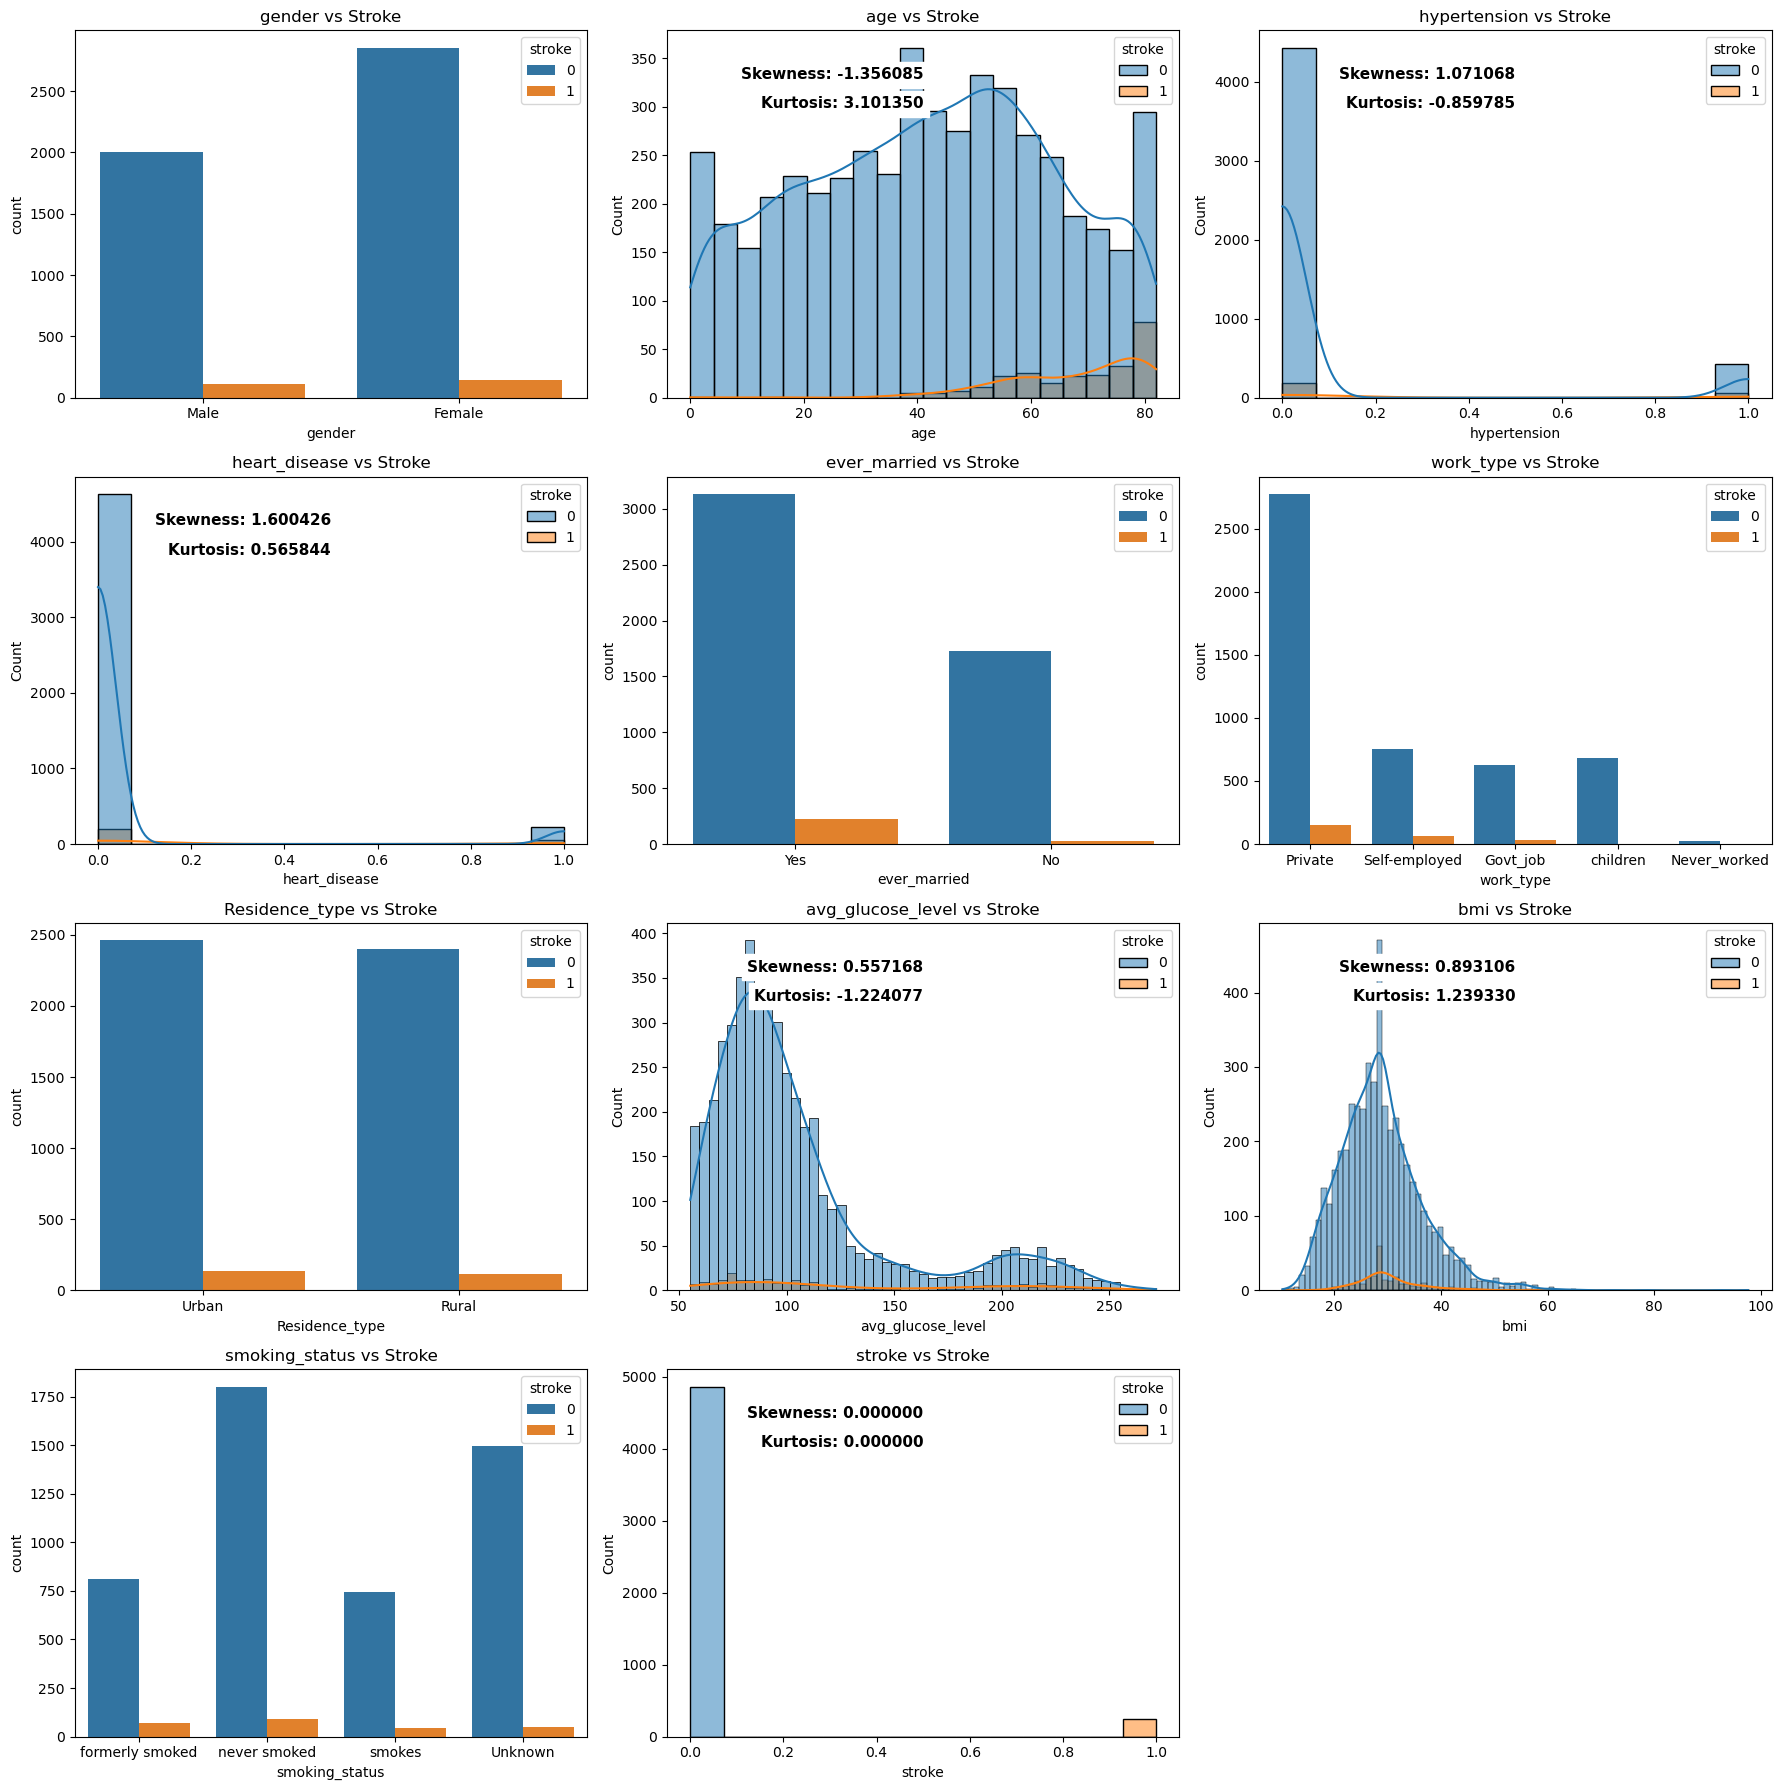

In [107]:
# Sélection des colonnes à visualiser
columns = df.columns[1:]

# Création de sous-plots avec 3 lignes et 3 colonnes
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 18))

# Boucle pour créer des graphiques
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3

    if df[column].dtype == 'object':
        # Pour les variables catégorielles
        sns.countplot(x=column, hue='stroke', data=df, ax=axes[row, col])
        axes[row, col].set_title(f'{column} vs Stroke')
    else:
        # Pour les variables continues
        sns.histplot(x=column, hue='stroke', data=df, kde=True, ax=axes[row, col])
        axes[row, col].set_title(f'{column} vs Stroke')
        # Ajout des informations de skewness et kurtosis
        skewness = df_1[column].skew()
        kurt = df_1[column].kurt()
        if not pd.isnull(skewness) and not pd.isnull(kurt):
            axes[row, col].text(x=0.5, y=0.90, transform=axes[row, col].transAxes,
                                s="Skewness: %f" % skewness,
                                fontweight='demibold', fontsize=11, verticalalignment='top',
                                horizontalalignment='right', backgroundcolor='white')
            axes[row, col].text(x=0.5, y=0.80, transform=axes[row, col].transAxes,
                                s="Kurtosis: %f" % kurt,
                                fontweight='demibold', fontsize=11, verticalalignment='center',
                                horizontalalignment='right', backgroundcolor='white')

# Ajustement de l'espacement entre les sous-plots
fig.delaxes(axes[3,2])
plt.tight_layout()
plt.show()


In [100]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89456,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89456,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60000,formerly smoked,0


In [95]:
df_scaled.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_gender_Female,gender_gender_Male,ever_married_ever_married_No,...,work_type_work_type_Never_worked,work_type_work_type_Private,work_type_work_type_Self-employed,work_type_work_type_children,Residence_type_Residence_type_Rural,Residence_type_Residence_type_Urban,smoking_status_smoking_status_Unknown,smoking_status_smoking_status_formerly smoked,smoking_status_smoking_status_never smoked,smoking_status_smoking_status_smokes
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,...,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,-0.011056,-0.049167,0.097475,0.054022,0.386985,0.054951,0.048738,-0.413975,0.413975,0.343707,...,0.004306,-0.427677,0.160305,0.134469,0.491877,-0.491877,0.302212,0.173028,0.370327,0.154433
std,0.573450,0.628155,0.296633,0.226084,1.228901,0.855359,0.215340,0.492592,0.492592,0.474991,...,0.065486,0.494790,0.366925,0.341188,0.499983,0.499983,0.459261,0.378308,0.482939,0.361399
min,-0.998699,-1.247778,0.000000,0.000000,-0.997558,-2.011111,0.000000,-1.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.519795,-0.555556,0.000000,0.000000,-0.397286,-0.511111,0.000000,-1.000000,0.000000,0.000000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.480205,0.444444,0.000000,0.000000,0.602714,0.488889,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,0.976018,1.027778,1.000000,1.000000,4.880868,7.688889,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
